# What is Statistics for?

Quora Threads [1](https://www.quora.com/Does-data-science-need-statistics)_


> ### Statistics helps answer questions like

- Is there a relationship between two or more variables?
- How confident are you about the produced results?
- Is the effect we've found **real** or did this happen by chance?
- Which version of this is better? 
- Is this drug effective?
- How is your data distributed?
- Are there outliers in your data?

> ### Topics that we will cover

- Basic Statistical Metrics and their use
- Histograms
- Discrete and Continuous Distributions
    - what they're used for
    - properties
- Using Scipy for Stats
- Fitting distributions to your data
- Hypothesis Testing
- Regression

> ### Books and Resources for learning Statistics

- Think Stats 2nd Edition (free online version [here](http://greenteapress.com/thinkstats/thinkstats.pdf))
- Discovering Statistics with R [here](http://libgen.io/get.php?md5=C52094DE0C48BFD0D0A232E87C2232DF&key=O8KRC38Z1VB07UYI)
- Statistics Done Wrong

---
# Introduction to Statistics

In [1]:
import pandas as pd
import numpy as np
import pylab as pl

import seaborn as sns

%matplotlib inline

In [2]:
from scipy.stats import norm, gamma, beta

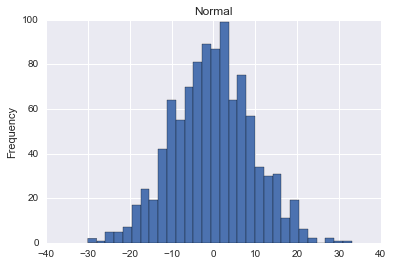

In [12]:
x = pd.Series(norm.rvs(0, 10, 1000))
x.plot.hist(bins=30, title='Normal');

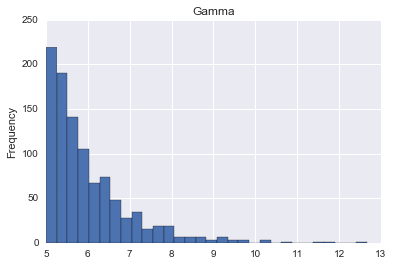

In [15]:
y = pd.Series(gamma.rvs(1, 5, 1, size=1000))
y.plot.hist(bins=30, title='Gamma');

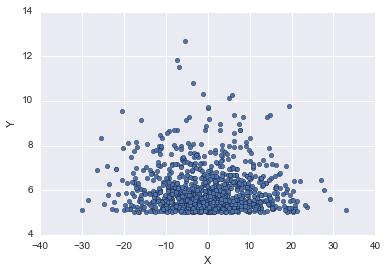

In [35]:
pd.DataFrame(data={'X': x, 'Y': y}).plot.scatter('X', 'Y');

### NumPy for Statistics

### Creating arrays

---

1. Without Data (filled with Zeros)

In [38]:
np.ndarray(shape=(2,2))

array([[ 0.,  0.],
       [ 0.,  0.]])

In [39]:
np.ndarray(shape=(2,2), dtype=int)

array([[0, 0],
       [0, 0]])

---

2. With Data

In [40]:
np.array([1, 2, 9])

array([1, 2, 9])

In [41]:
np.array([[1, 2, 9], [3, 4, 0]])

array([[1, 2, 9],
       [3, 4, 0]])

In [42]:
arr1 = np.arange(15).reshape(5, 3); arr1

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

### Methods, Attributes

In [ ]:
# Press tab after the dot to see a list of methods
arr1.

In [43]:
print arr1.T

[[ 0  3  6  9 12]
 [ 1  4  7 10 13]
 [ 2  5  8 11 14]]


In [44]:
arr1.cumsum?

In [45]:
arr1.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21],
       [ 9, 19, 30],
       [12, 25, 39]])

---
## Summary Statistics

- Problem: Given a bunch of datapoints:
    - characterize the distribution in one or two values
    - Characterization should be robust to outliers

In [47]:
dummyArray = np.random.randn(16).reshape(4, 4).round(3)

dummyArray

array([[ 1.228,  1.469,  0.6  ,  0.832],
       [ 0.167, -1.49 , -1.182, -0.255],
       [ 0.518, -0.347, -1.525,  1.419],
       [-0.966,  0.131, -0.41 , -0.041]])

In [48]:
print(np.mean(dummyArray))
print(np.median(dummyArray))

0.00925
0.045


---
## The Mean

- Represents center of mass
- If the values are close together this is a good representative
- There will ALWAYS exist a mean - but it will not always be helpful.
- Influenced by Outliers

### Application

- Impute missing data of symmetrically distributed variables

---
## The Median

- 50th Percentile
- A Median always exists
- Median is not unique
- Can be computed in linear time
- Not influenced by outliers (robust)

### Applications in Data Science

- Helps understand the data
- Used to fill missing data of skewed variables

---

## Percentiles

- Classical summary statistics good for describing the body of the distribution
- Need information about the tail of the distributions
- Determine outliers in a dataset

In [49]:
np.percentile(dummyArray, [35, 45, 65])

array([-0.324  , -0.0945 ,  0.43025])

### **What is the IQR?**

- The interquartile range of a sample X is defined as: `IQR(X) = Q(0.75,X) - Q(0.25,X)`
- It is a robust measure for variance of the data. 
- Good alternative to standard / mean deviation.

### **What is an outlier?**

- Def. (Tukey, 1969) a k-outlier is a data point X which is either
    - larger than `Q(0.75) + k * IQR(X)` or
    - smaller than `Q(0.25) - k * IQR(X)` 
    
### Applications in Data Science:

- Identifying outliers.
    - Treat outliers by capping them 

---
## Example

- Create a 10 x 8 ndarray, 
    - fill it with rnorm values, 
    - cap all values greater than the 90th percetile and below the 10th percentile at these threholds

In [59]:
r_arr = np.random.randn(60).reshape(10, 6).round(2)

In [60]:
print r_arr

[[ 1.78  0.62 -1.24  0.25 -0.2  -0.51]
 [ 2.73  1.54  0.7  -0.03 -3.01 -0.94]
 [ 0.3   0.19 -0.46  0.93  0.28  0.62]
 [-0.65 -0.67 -0.23  0.56 -1.28  2.59]
 [ 1.32 -0.75  2.61  1.39  0.76  0.32]
 [-0.04 -1.48 -0.32  0.77  0.84 -0.65]
 [ 0.89 -0.06  1.66  0.03 -0.17  0.24]
 [ 0.1   0.64  0.87 -1.25 -0.01 -0.57]
 [-1.67 -2.47  0.17 -0.93 -1.01  0.07]
 [ 1.05  1.13 -1.06 -0.49 -0.59 -0.7 ]]


In [61]:
np.percentile(r_arr, [10, 90])

array([-1.241,  1.405])

In [63]:
r_arr[r_arr > np.percentile(r_arr, 90)] = np.percentile(r_arr, 90)
r_arr[r_arr < np.percentile(r_arr, 10)] = np.percentile(r_arr, 10)

print r_arr

[[ 1.405  0.62  -1.24   0.25  -0.2   -0.51 ]
 [ 1.405  1.405  0.7   -0.03  -1.241 -0.94 ]
 [ 0.3    0.19  -0.46   0.93   0.28   0.62 ]
 [-0.65  -0.67  -0.23   0.56  -1.241  1.405]
 [ 1.32  -0.75   1.405  1.39   0.76   0.32 ]
 [-0.04  -1.241 -0.32   0.77   0.84  -0.65 ]
 [ 0.89  -0.06   1.405  0.03  -0.17   0.24 ]
 [ 0.1    0.64   0.87  -1.241 -0.01  -0.57 ]
 [-1.241 -1.241  0.17  -0.93  -1.01   0.07 ]
 [ 1.05   1.13  -1.06  -0.49  -0.59  -0.7  ]]


---

How to do this in Pandas?

```
pd.Series.clip_upper(upper-threshold)
pd.Series.clip_lower(lower-threshold)

```

---

In [67]:
from pandas import Series, DataFrame
df_arr = DataFrame(r_arr)

print df_arr.clip_upper(np.percentile(r_arr, 95)).clip_lower(np.percentile(r_arr, 5)).values

### Example using Titanic Data

In [73]:
df_titanic = pd.read_csv("train.csv")

In [ ]:
# Histograms 

df_titanic['Fare'].hist(bins=range(0, 600, 10));

(df_titanic['Fare']
 .clip_upper(df_titanic['Fare'].quantile(0.95))
 .plot(kind='hist', xlim=(0, 600), bins=range(0, 600, 10))
);

In [ ]:
# Describe

print df_titanic['Fare'].describe()

print (df_titanic['Fare']
 .clip_upper(df_titanic['Fare'].quantile(0.95))
 .describe()
)

In [ ]:
# Quantiles beyond 90

df_titanic['Fare'].quantile(np.arange(0.9, 1.0, 0.01))

(df_titanic['Fare']
 .clip_upper(df_titanic['Fare'].quantile(0.95))
 .quantile(np.arange(0.9, 1.0, 0.01)))

---

# Standard Deviation


> Standard deviation is a number used to tell how measurements for a group are spread out from the average (mean), or expected value. 
- A low standard deviation means that most of the numbers are very close to the average. 
- A high standard deviation means that the numbers are spread out.



- Measure the 'typical' displacement from the mean value.
- Standard deviation is popular because it has extremely nice mathematical properties.
- Standard deviation is a good deviation for normal distributed data
- Large effect on Outliers


In [102]:
# Distribution of ages of people attending this class
ages = np.random.randint(20, 30, 15)

In [112]:
# Deviation from the mean
np.sqrt(np.sum([(x - np.mean(ages))**2 for x in ages]) / float(15))

2.9589788028229531

In [113]:
np.std(ages)

2.9589788028229531

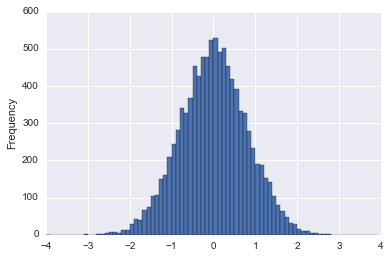

In [137]:
Series(np.random.normal(0, 0.8, 10000)).plot(kind='hist', bins=np.arange(-4, 4, 0.1));

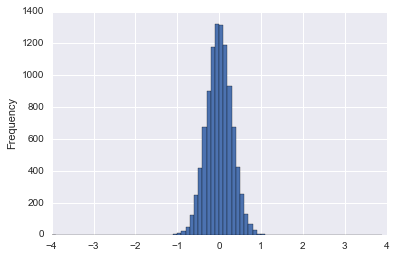

In [138]:
Series(np.random.normal(0, 0.3, 10000)).plot(kind='hist', bins=np.arange(-4, 4, 0.1));


## Caution with Standard Deviation
Everybody Learns about standard deviation in school
Beautiful mathematical properties!
Everybody knows

- "68% of data falls within 1 std-dev of the mean"
- "95% falls within 2 std-dev of the mean"
- "99.7" falls within 3 std-dev of the mean"

> "Problem is: this is utter nonsense". Only true for normally distributed data.

- Not good for measuring outliers!

In [141]:
x=Series(np.random.beta(0.2, 0.5, 10**3))
print x.mean(), x.std()

0.286331679604 0.348936485165


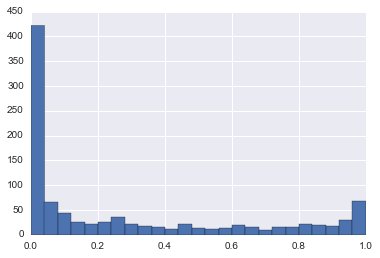

In [142]:
x.hist(bins=25)

In [150]:
print 1 - ((x > x.mean() + x.std()).value_counts()[False])/1000.0
print 1 - ((x < x.mean() - x.std()).value_counts()[False])/1000.0

0.217
0.0


---
# Distributions

Wikipedia [1](https://en.wikipedia.org/wiki/Probability_distribution) and [2](https://en.wikipedia.org/wiki/List_of_probability_distributions)

> ```In probability and statistics, a probability distribution is a mathematical description of a random phenomenon in terms of the probabilities of events.``

<img src = 'http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png'>

## Normal

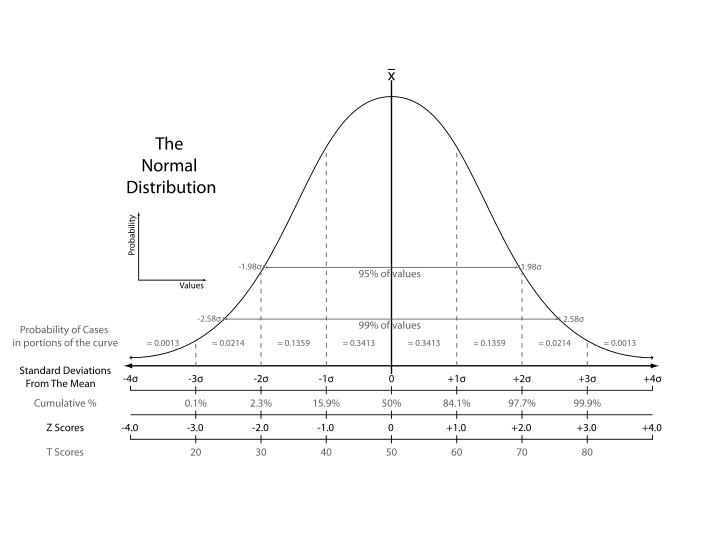

In [151]:
from IPython.display import Image
url='http://upload.wikimedia.org/wikipedia/commons/thumb/2/25/The_Normal_Distribution.svg/725px-The_Normal_Distribution.svg.png'
Image(url,height=400,width=600)

```
np.random.normal?
    - generates normally distributed random numbers with mu = 0 and sigma = 1
np.random.rnorm?
    - takes mu and sigma as its parameters
```

In [169]:
normalArray = np.random.normal(5, 1, 10000)

In [170]:
normalArray.mean()

4.9916034208830622

In [171]:
normalArray.std()

1.0054617186604307

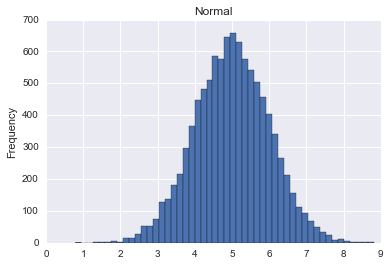

In [172]:
Series(normalArray).plot(kind='hist', bins=50, title='Normal')

---

## Poisson

```
> The Poisson distribution is the limit of the binomial distribution
for large N.
```

<img src="https://www.umass.edu/wsp/images/poisson3.gif">


### Applications

- • The number of bankruptcies that are filed in a month
- • The number of arrivals at a car wash in one hour 
- • The number of network failures per day 
- • The number of soldiers of the Prussian army killed accidentally by horse kick per year
- • The number of mutations on a given strand of DNA per time unit

In [174]:
np.random.poisson?

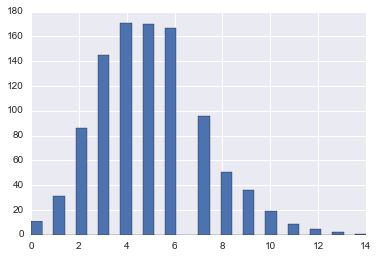

In [186]:
pois_arr = np.random.poisson(5, 1000)
pl.hist(pois_arr,  bins=30);

In [187]:
np.mean(pois_arr)

4.9669999999999996

In [188]:
np.std(pois_arr)

2.2658135404308979

---
### Pareto Distribution

> 80/20 Rule

```
20% of the people hold 80% of the wealth of a nation.
20% of your customers give you 80% of your revenue.
```

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Probability_density_function_of_Pareto_distribution.svg/368px-Probability_density_function_of_Pareto_distribution.svg.png">

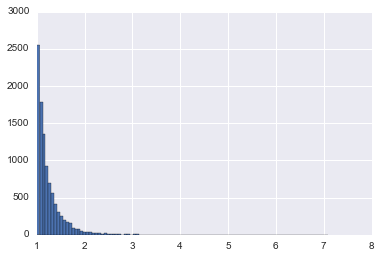

In [203]:
from scipy import stats
pareto_arr = stats.pareto.rvs(5, size=10000)

pl.hist(pareto_arr, bins=100);

In [204]:
print stats.describe(pareto_arr)

DescribeResult(nobs=10000, minmax=(1.0000142030520538, 7.095484011346139), mean=1.2496089947450328, variance=0.099425902060818111, skewness=4.141115516140411, kurtosis=37.1494230333554)


---
## Binomial


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/75/Binomial_distribution_pmf.svg/434px-Binomial_distribution_pmf.svg.png">

In [205]:
np.random.binomial?

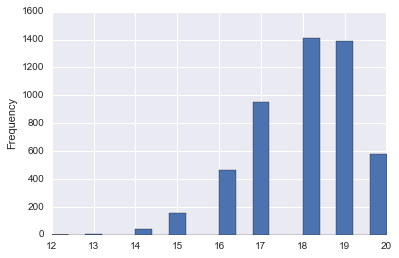

In [213]:
binom_arr = np.random.binomial(20, 0.9, size=5000)

pd.Series(binom_arr).plot(kind='hist', bins=20);

In [ ]:
stats.describe(binom_arr)

---

## Explore Distributions in the Titanic Data

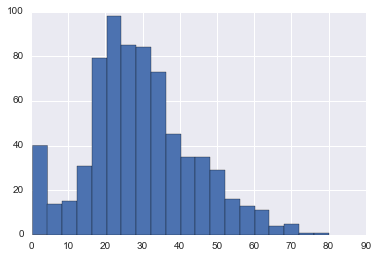

In [218]:
df_titanic['Age'].hist(bins=20);

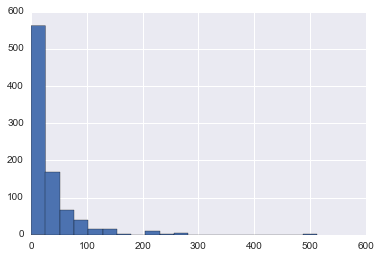

In [222]:
df_titanic['Fare'].hist(bins=20);

In [2]:
data = pd.Series(np.random.normal(loc=110,scale=20,size=10000))
# mean, sd

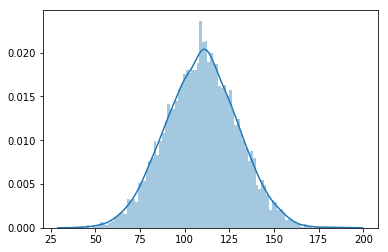

In [3]:
sns.distplot(data,bins=100)

In [5]:
Avg = round(data.mean(),2)

In [6]:
Std = round(data.std())

In [8]:
LC = Avg - Std
UC = Avg + Std

In [11]:
data.loc[(data > LC) & (data < UC)]

0       110.699303
1        93.745177
3       103.563605
4        91.176577
5       115.538369
6       115.315203
7       125.699720
9       107.846199
10      109.932062
11      117.720381
12      109.371825
14      126.534080
15      100.303764
16      112.985321
19      120.582019
22      111.372789
23      119.819229
24      109.764065
25      109.051210
26      109.246002
27      129.404666
28      107.644652
29      104.241640
30       94.946495
32       97.755493
34       90.197480
36      117.503374
39      110.500793
40      114.079066
41      116.848303
           ...    
9956    108.457046
9957     94.890571
9959     94.625267
9960    111.610648
9961    127.960940
9962    123.666792
9963    111.814200
9964    106.303773
9965     97.690233
9966    112.065330
9968    102.555097
9969    111.756035
9972     96.117027
9974    113.066690
9978     95.762535
9979    113.018914
9983     97.833760
9984    123.691549
9985    113.405160
9986    105.649086
9988    113.776283
9989    100.

In [10]:
6755/10000

0.6755

In [12]:
LC = Avg - 2*Std
UC = Avg + 2*Std

len(data.loc[(data > LC) & (data < UC)])

9521

In [13]:
LC = Avg - 3*Std
UC = Avg + 3*Std

len(data.loc[(data > LC) & (data < UC)])

9975

In [15]:
# The standard Normal Curves
# A Normal Curve undergoing a transformation
# This transformation is called a Z transform
Z_data = (data - data.mean())/data.std()


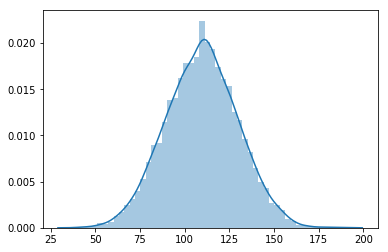

In [16]:
sns.distplot(data)

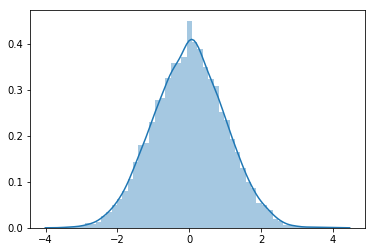

In [18]:
sns.distplot(Z_data)

In [36]:
Unif_Dist = np.random.uniform(high=6,low=1,size=100000)
Unif_Dist = pd.Series(Unif_Dist)
Unif_Dist[0:10]

0    2.004185
1    5.728614
2    4.152677
3    4.104470
4    2.330440
5    5.599549
6    3.803584
7    5.836582
8    4.547647
9    3.213679
dtype: float64

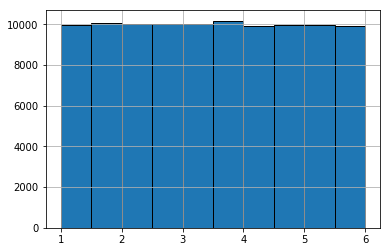

In [37]:
Unif_Dist.hist(edgecolor="black")

In [38]:
s = Unif_Dist.sample(n=30)
mean = s.mean()

In [39]:
mean = []
for i in range(1,3001):
    s = Unif_Dist.sample(n=30)
    mean.append(s.mean())
    s = 0

In [41]:
mean = pd.Series(mean)

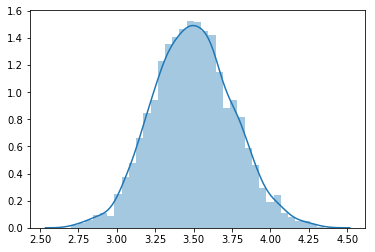

In [42]:
sns.distplot(mean)